<a href="https://colab.research.google.com/github/Shiwani123693/Brain_Tumor_Segmentation_BCP/blob/main/Week_2/Python_libraries/Nibabel/nibabel_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nibabel Basics Notebook
### *Learning how to load and view MRI scans*

## Import Libraries
We need nibabel for MRI files and matplotlib for plotting.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## Upload an MRI File (.nii.gz)
Upload any NIfTI file.

In [ ]:
from google.colab import files
uploaded = files.upload()

## Load MRI File
Nibabel loads the 3D MRI volume as a NumPy array.

In [3]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()
print('MRI Shape:', mri.shape)

MRI Shape: (240, 240, 155)


## Visualize a Middle Slice
MRI is 3D. We view one slice at a time.

In [ ]:
slice_index = mri.shape[2] // 2
plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f'Slice {slice_index}')
plt.axis('off')

## Extract All Slices
Convert 3D MRI into 2D slices.

In [ ]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
len(slices)

## Normalize a Slice
Normalization improves contrast.

In [ ]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.imshow(norm_slice, cmap='gray')
plt.title('Normalized Slice')
plt.axis('off')

## Resize Slice (Used in ML Preprocessing)

In [ ]:
import tensorflow as tf
resized = tf.image.resize(norm_slice[..., None], (128, 128))
plt.imshow(resized.numpy().squeeze(), cmap='gray')
plt.title('Resized Slice (128×128)')
plt.axis('off')

## **Exercises**
1. Load **another** MRI file and visualize 5 slices.
2. Write a function `plot_slices(volume, indices)` to plot given slice numbers.
3. Create a function to normalize **all** slices and return the new array.
4. Resize all slices to 128×128 and count how many slices contain tumor pixels (if mask available).


# Exercise Solution
### 1.)


In [8]:
from google.colab import files
uploaded2 = files.upload()


Saving flair.nii.gz to flair.nii (1).gz


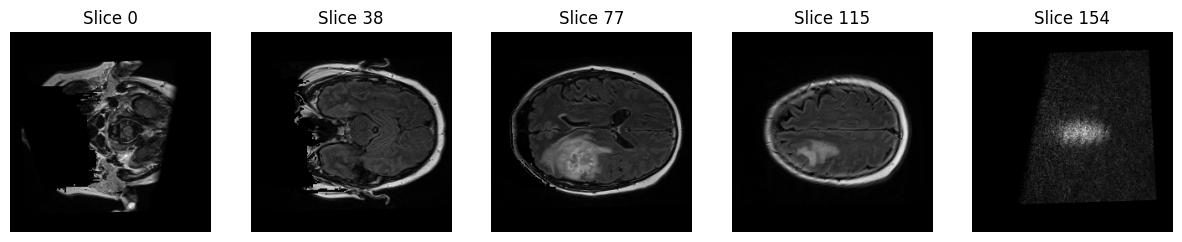

In [9]:
def show_five_slices(volume):
    indices = np.linspace(0, volume.shape[2]-1, 5, dtype=int)
    plt.figure(figsize=(15, 3))

    for i, idx in enumerate(indices):
        plt.subplot(1, 5, i+1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f'Slice {idx}')
        plt.axis('off')

    plt.show()

# Usage
show_five_slices(mri)


### 2.)

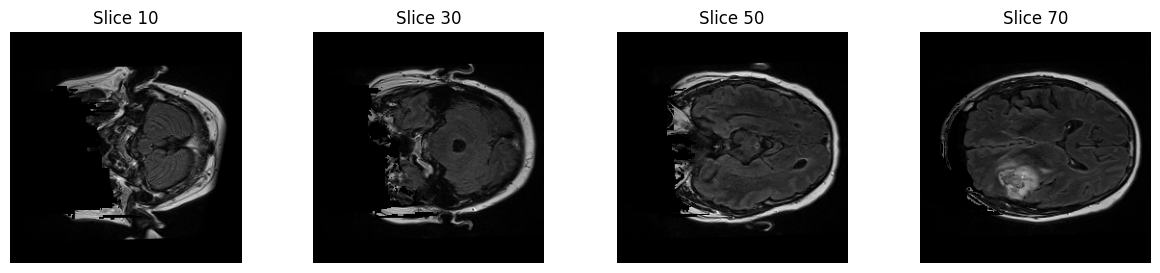

In [10]:
def plot_slices(volume, indices):
    plt.figure(figsize=(15, 3))

    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i+1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f'Slice {idx}')
        plt.axis('off')

    plt.show()

# Example
plot_slices(mri, [10, 30, 50, 70])


### 3.)

In [11]:
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    return (volume - min_val) / (max_val - min_val)

# Usage
normalized_mri = normalize_volume(mri)


### 4.)

In [15]:
## Resize all slices to 128×128
def resize_volume(volume, size=(128, 128)):
    resized_slices = []

    for i in range(volume.shape[2]):
        slice_2d = volume[:, :, i]
        resized = tf.image.resize(slice_2d[..., None], size)
        resized_slices.append(resized.numpy().squeeze())

    return np.array(resized_slices)

# Usage
resized_mri = resize_volume(normalized_mri)
print(resized_mri.shape)

## Count tumor slices
def count_tumor_slices(mask):
    count = 0
    for i in range(mask.shape[2]):
        if np.any(mask[:, :, i] > 0):
            count += 1
    print("Number of tumor slices:", count)




(155, 128, 128)
